### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [16]:
import tensorflow as tf
tf.set_random_seed(42)

In [17]:
tf.__version__

'1.10.0'

### Collect Data

In [18]:
import keras

In [67]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [68]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [69]:
testY

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [70]:
trainY_cat=tf.keras.utils.to_categorical(trainY,num_classes=10)

In [71]:
testY_cat=tf.keras.utils.to_categorical(testY,num_classes=10)

In [72]:
print(trainY_cat.shape)
print('First 5 examples now are: ', trainY_cat[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [73]:
print(testY_cat.shape)
print('First 5 examples now are: ', testY_cat[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [74]:
#trainX = trainX / 255.0

#testX = testX / 255.0

In [161]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

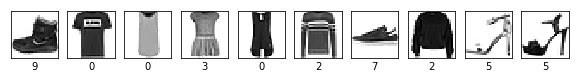

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [77]:
model0 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [78]:
model0.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [83]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 14.5063 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 4s 58us/step - loss: 14.5063 - acc: 0.1000


In [84]:
test_loss, test_acc = model.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/step
Test accuracy: 0.1


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [116]:

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [117]:
model1.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model

In [118]:
model1.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.5593 - acc: 0.8030
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.4197 - acc: 0.8499
Epoch 3/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.3840 - acc: 0.8625
Epoch 4/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3620 - acc: 0.8706
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3451 - acc: 0.8761


In [119]:
test_loss, test_acc = model1.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/step
Test accuracy: 0.8656


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [104]:
from keras import optimizers

sgd=optimizers.SGD(lr=0.001)

In [105]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [106]:
model2.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
model2.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.9681 - acc: 0.6712
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.6238 - acc: 0.7846
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.5573 - acc: 0.8059
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.5184 - acc: 0.8200
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.4966 - acc: 0.8262


In [120]:
test_loss, test_acc = model2.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8268


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [141]:
sgd1=optimizers.SGD(lr=0.03)

In [142]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [143]:
model3.compile(optimizer=sgd1, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Review model

In [144]:
model3.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 1.0460 - acc: 0.6891
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.5711 - acc: 0.7987
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4898 - acc: 0.8263
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4525 - acc: 0.8392
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.4303 - acc: 0.8470


### Run the model

In [145]:
test_loss, test_acc = model3.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/step
Test accuracy: 0.8456


In [146]:
predictions = model.predict(testX)

In [150]:
import numpy as np
np.argmax(predictions[3])

1

In [151]:
testY[3]


1

In [155]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


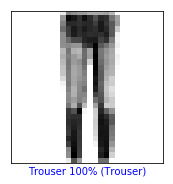

In [162]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testY, testX)
plt.show()

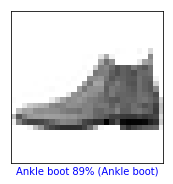

In [163]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testY, testX)
plt.show()

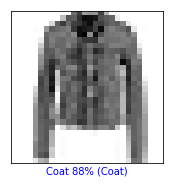

In [164]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testY, testX)
plt.show()